# Data analysis and ML on Netflix Data

Netflix is a video streaming subscription service that allows you to search their catalogue of TV shows and movies to watch what you want, when you want to watch it.

The dataset is a collection of Netflix movies and series data from JustWatch with date of March 2023, containing data available in the United States. The dataset was taken from: https://www.kaggle.com/datasets/dgoenrique/netflix-movies-and-tv-shows

In this notebook there will be an exploratory analysis of the dataset and later, a machine learning (ML) technique will be applied on this data

In [2]:
# import python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("titles.csv")
df.head()

id                                title   type  \
0  ts300399  Five Came Back: The Reference Films   SHOW   
1   tm82169                                Rocky  MOVIE   
2   tm17823                               Grease  MOVIE   
3  tm191099                            The Sting  MOVIE   
4   tm69975                             Rocky II  MOVIE   

                                         description  release_year  \
0  This collection includes 12 World War II-era p...          1945   
1  When world heavyweight boxing champion, Apollo...          1976   
2  Australian good girl Sandy and greaser Danny f...          1978   
3  A novice con man teams up with an acknowledged...          1973   
4  After Rocky goes the distance with champ Apoll...          1979   

  age_certification  runtime                                 genres  \
0             TV-MA       51                      ['documentation']   
1                PG      119                     ['drama', 'sport']   
2                PG      110                  ['romance', 'comedy']   
3                PG      129  ['crime', 'drama', 'comedy', 'music']   
4                PG      119                     ['drama', 'sport']   

  production_countries  seasons    imdb_id  imdb_score  imdb_votes  \
0               ['US']      1.0        NaN         NaN         NaN   
1               ['US']      NaN  tt0075148         8.1    588100.0   
2               ['US']      NaN  tt0077631         7.2    283316.0   
3               ['US']      NaN  tt0070735         8.3    266738.0   
4               ['US']      NaN  tt0079817         7.3    216307.0   

   tmdb_popularity  tmdb_score  
0            0.601         NaN  
1          106.361       7.782  
2           33.160       7.406  
3           24.616       8.020  
4           75.699       7.246

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137 entries, 0 to 6136
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6137 non-null   object 
 1   title                 6137 non-null   object 
 2   type                  6137 non-null   object 
 3   description           6114 non-null   object 
 4   release_year          6137 non-null   int64  
 5   age_certification     3394 non-null   object 
 6   runtime               6137 non-null   int64  
 7   genres                6137 non-null   object 
 8   production_countries  6137 non-null   object 
 9   seasons               2306 non-null   float64
 10  imdb_id               5741 non-null   object 
 11  imdb_score            5669 non-null   float64
 12  imdb_votes            5653 non-null   float64
 13  tmdb_popularity       6061 non-null   float64
 14  tmdb_score            5885 non-null   float64
dtypes: float64(5), int64(

Having a first glance at the dataset, some descriptions are missing, "seasons" column has the most Null values as the only rows containing that value are series and not movies. On the other hand, there is complimentary data, as the ratings on IMdb and TMDB, but these as well have missing values.

In [5]:
df_clean=df.copy()
df_clean.drop(["id","imdb_id"],axis=1,inplace=True)
df_clean["seasons"]=df_clean["seasons"].fillna(0)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137 entries, 0 to 6136
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 6137 non-null   object 
 1   type                  6137 non-null   object 
 2   description           6114 non-null   object 
 3   release_year          6137 non-null   int64  
 4   age_certification     3394 non-null   object 
 5   runtime               6137 non-null   int64  
 6   genres                6137 non-null   object 
 7   production_countries  6137 non-null   object 
 8   seasons               6137 non-null   float64
 9   imdb_score            5669 non-null   float64
 10  imdb_votes            5653 non-null   float64
 11  tmdb_popularity       6061 non-null   float64
 12  tmdb_score            5885 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 623.4+ KB


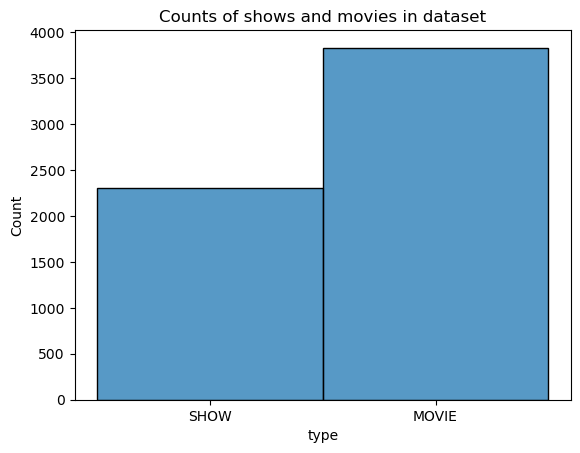

In [6]:
plt.figure()
ax=sns.histplot(x="type",data=df_clean,kde=False)
plt.title("Counts of shows and movies in dataset")
plt.show()

The genre column contains lists of different classifications of genre for the movies and series. Dummy columns will be added for each category.

The same happens with the country of production.

In [7]:
# original data type of column genres is string:
df_clean["genres"]

0                           ['documentation']
1                          ['drama', 'sport']
2                       ['romance', 'comedy']
3       ['crime', 'drama', 'comedy', 'music']
4                          ['drama', 'sport']
                        ...                  
6132                     ['family', 'comedy']
6133                        ['documentation']
6134                               ['comedy']
6135                                ['drama']
6136                               ['family']
Name: genres, Length: 6137, dtype: object

In [8]:
# test with ast to convert string to list
import ast
ast.literal_eval('["crime", "drama", "comedy", "music"]')

['crime', 'drama', 'comedy', 'music']

In [9]:
# convert string values to list in genres and countries columns
def clean_alt_list_t(list_):
    list_ = list_.replace("'", "\"")
    return list_

def convert_list(obj):
    return ast.literal_eval(obj)

df_clean["genres"]=df_clean["genres"].apply(clean_alt_list_t)
df_clean["genres"]=df_clean["genres"].apply(convert_list)
df_clean["production_countries"]=df_clean["production_countries"].apply(clean_alt_list_t)
df_clean["production_countries"]=df_clean["production_countries"].apply(convert_list)

In [10]:
# converted to list:
df_clean["genres"]

0                     [documentation]
1                      [drama, sport]
2                   [romance, comedy]
3       [crime, drama, comedy, music]
4                      [drama, sport]
                    ...              
6132                 [family, comedy]
6133                  [documentation]
6134                         [comedy]
6135                          [drama]
6136                         [family]
Name: genres, Length: 6137, dtype: object

And now, let's see info about the genres of the available titles:

In [11]:
def boolean_df(item_lists, unique_items):
# Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [12]:
# get dummies for genres
def to_1D(series):   #also from https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
    return pd.Series([x for _list in series for x in _list])

genres_all = to_1D(df_clean["genres"]).value_counts().index.tolist()
genres_bool = boolean_df(item_lists = df_clean["genres"],unique_items = genres_all)
genres_bool

drama  comedy  thriller  action  romance  documentation  crime  \
0     False   False     False   False    False           True  False   
1      True   False     False   False    False          False  False   
2     False    True     False   False     True          False  False   
3      True    True     False   False    False          False   True   
4      True   False     False   False    False          False  False   
...     ...     ...       ...     ...      ...            ...    ...   
6132  False    True     False   False    False          False  False   
6133  False   False     False   False    False           True  False   
6134  False    True     False   False    False          False  False   
6135   True   False     False   False    False          False  False   
6136  False   False     False   False    False          False  False   

      animation  family  fantasy  scifi  european  horror  reality  history  \
0         False   False    False  False     False   False    False    False   
1         False   False    False  False     False   False    False    False   
2         False   False    False  False     False   False    False    False   
3         False   False    False  False     False   False    False    False   
4         False   False    False  False     False   False    False    False   
...         ...     ...      ...    ...       ...     ...      ...      ...   
6132      False    True    False  False     False   False    False    False   
6133      False   False    False  False     False   False    False    False   
6134      False   False    False  False     False   False    False    False   
6135      False   False    False  False     False   False    False    False   
6136      False    True    False  False     False   False    False    False   

      music  sport    war  western  
0     False  False  False    False  
1     False   True  False    False  
2     False  False  False    False  
3      True  False  False    False  
4     False   True  False    False  
...     ...    ...    ...      ...  
6132  False  False  False    False  
6133  False  False  False    False  
6134  False  False  False    False  
6135  False  False  False    False  
6136  False  False  False    False  

[6137 rows x 19 columns]

In [13]:
# get counts of dummies for genres
genres_int=genres_bool.astype(int)
genres_freq_mat=np.dot(genres_bool.T,genres_bool)
np.tril(genres_freq_mat)

array([[ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False],
       [ True,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False],
       [ True,  True,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False],
       [ True,  True,  True,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False],
       [ True,  True,  True,  True,  True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False],
       [ True,  True,  True,  True,  True,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False],
       [ True,  True,  True,  True,  True,  True,  T

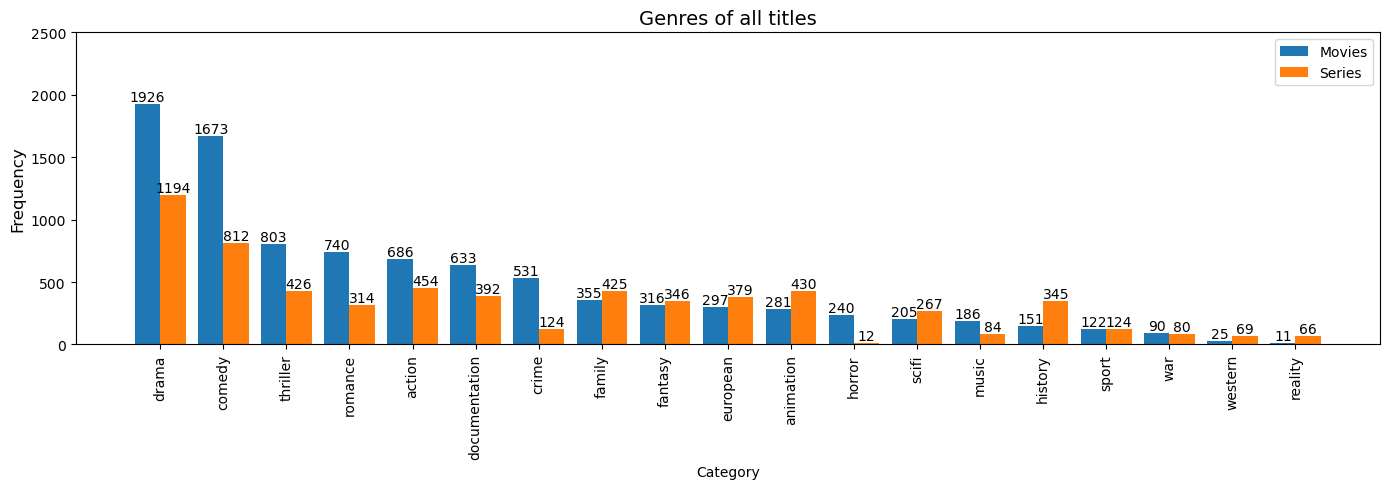

In [14]:
# Plot genre by type of title
def to_1D(series):   #also from https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
    return pd.Series([x for _list in series for x in _list])

df_clean_movies=df_clean[df_clean["type"]=="MOVIE"]
df_clean_series=df_clean[df_clean["type"]=="SHOW"]
genre_movies = to_1D(df_clean_movies["genres"]).value_counts().index.tolist()
unique_value_counts_mov = to_1D(df_clean_movies["genres"]).value_counts().values
genre_shows = to_1D(df_clean_series["genres"]).value_counts().index.tolist()
unique_value_counts_ser = to_1D(df_clean_series["genres"]).value_counts().values

sort_gen=[]
for genre_show in genre_shows:
    sort_gen.append(genre_movies.index(genre_show))

xax=np.arange(len(genre_movies))

# Create plot
fig, ax = plt.subplots(figsize = (14,5),tight_layout=True)
ax.bar(xax-0.2, unique_value_counts_mov,width=0.4,label="Movies")
ax.bar(xax+0.2,unique_value_counts_ser[sort_gen],width=0.4,label="Series")
for bars in ax.containers:
    ax.bar_label(bars,)
ax.set_ylabel("Frequency", size = 12)
ax.set_ylim(top=2500)
ax.set_xticks(xax)
ax.set_xticklabels(genre_movies,rotation=90)
ax.set_xlabel("Category")
ax.set_title("Genres of all titles", size = 14)
ax.legend()
plt.show()

What about the origin of the production:

C:\Users\jsarmiento\AppData\Local\Temp\ipykernel_23540\2814812149.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


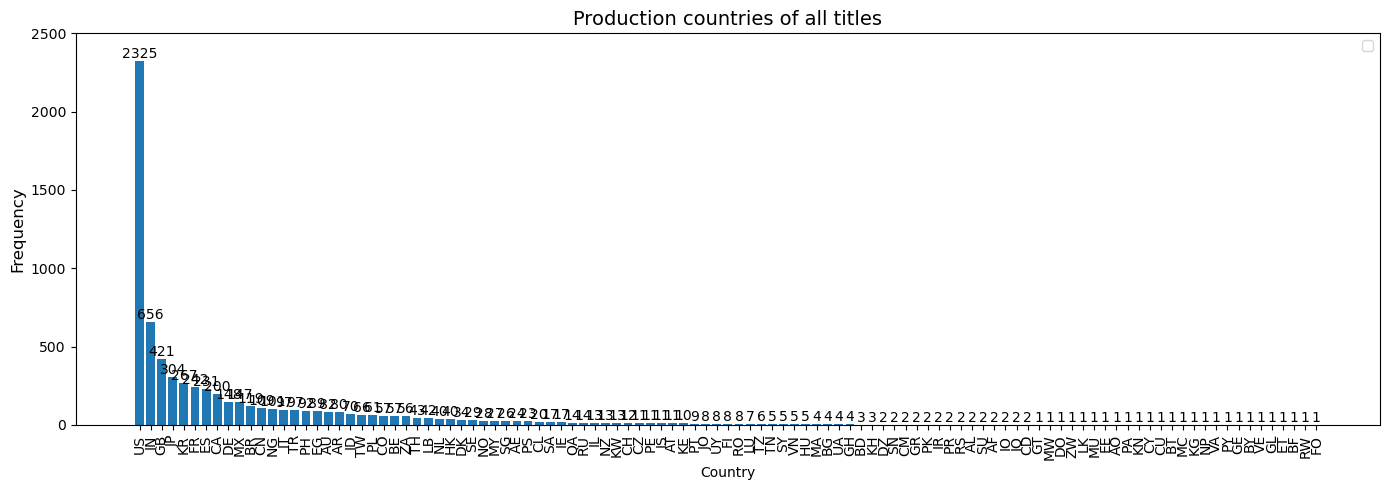

In [15]:
#first try of plotting production country
country = to_1D(df_clean["production_countries"]).value_counts().index.tolist()
unique_value_country = to_1D(df_clean["production_countries"]).value_counts().values

# sort_country=[]
# for country_show in country_shows:
#     sort_country.append(country_movies.index(country_show))

# xax=np.arange(len(country_movies))

# Create plot
fig, ax = plt.subplots(figsize = (14,5),tight_layout=True)
ax.bar(country,unique_value_country)
# ax.bar(xax-0.2,unique_value_counts_mov,width=0.4,label="Movies")
# ax.bar(xax+0.2,unique_value_counts_ser[sort_country],width=0.4,label="Series")
for bars in ax.containers:
    ax.bar_label(bars)
ax.set_ylabel("Frequency", size = 12)
ax.set_ylim(top=2500)
# ax.set_xticks(xax)
# ax.set_xticklabels(genre_movies,rotation=90)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_xlabel("Country")
ax.set_title("Production countries of all titles", size = 14)
ax.legend()
plt.show()

In [16]:
def to_1D_country(series):
    for _list in series:
        if len(_list)>0:
            return _list[:2]
        else:
            return np.nan

In [17]:
# create dummies for countries
countries_all = to_1D(df_clean["production_countries"]).value_counts().index.tolist()
countries_bool = boolean_df(item_lists = df_clean["production_countries"],unique_items = countries_all)
countries_bool

US     IN     GB     JP     KR     FR     ES     CA     DE     MX  \
0      True  False  False  False  False  False  False  False  False  False   
1      True  False  False  False  False  False  False  False  False  False   
2      True  False  False  False  False  False  False  False  False  False   
3      True  False  False  False  False  False  False  False  False  False   
4      True  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6132  False  False  False  False  False  False  False  False  False  False   
6133  False  False  False  False  False  False  False  False  False  False   
6134   True  False  False  False  False  False  False  False  False  False   
6135  False  False  False  False  False  False  False  False  False  False   
6136  False  False  False  False  False  False  False  False  False  False   

      ...     VA     PY     GE     BY     VE     GL     ET     BF     RW  \
0     ...  False  False  False  False  False  False  False  False  False   
1     ...  False  False  False  False  False  False  False  False  False   
2     ...  False  False  False  False  False  False  False  False  False   
3     ...  False  False  False  False  False  False  False  False  False   
4     ...  False  False  False  False  False  False  False  False  False   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
6132  ...  False  False  False  False  False  False  False  False  False   
6133  ...  False  False  False  False  False  False  False  False  False   
6134  ...  False  False  False  False  False  False  False  False  False   
6135  ...  False  False  False  False  False  False  False  False  False   
6136  ...  False  False  False  False  False  False  False  False  False   

         FO  
0     False  
1     False  
2     False  
3     False  
4     False  
...     ...  
6132  False  
6133  False  
6134  False  
6135  False  
6136  False  

[6137 rows x 107 columns]

In [18]:
#create counts for countries dummies
countries_int=countries_bool.astype(int)
countries_freq_mat=np.dot(countries_int.T,countries_int)
countries_freq_mat.diagonal()

array([2325,  656,  421,  304,  267,  242,  231,  200,  148,  147,  119,
        109,  101,   97,   97,   92,   89,   82,   80,   70,   66,   61,
         57,   57,   56,   43,   42,   40,   40,   34,   29,   28,   27,
         26,   24,   23,   20,   17,   17,   14,   14,   13,   13,   13,
         12,   11,   11,   11,   11,   10,    9,    8,    8,    8,    8,
          7,    6,    5,    5,    5,    5,    4,    4,    4,    4,    3,
          3,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1])

In [19]:
# get countries coordinates for map
from geopy.geocoders import Nominatim

geolocator=Nominatim(user_agent="Geolocation")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return [loc.latitude, loc.longitude]
    except:
        # Return missing value
        return np.nan
    
countries_coord=[]
for country in countries_bool.columns.to_list():
    countries_coord.append(geolocate(country))
# test_df=df_clean["production_countries"]
# test_df["new_col"]=test_df["production_countries"].apply(geolocate)

In [20]:
#Visualization of country of production for all titles 
import folium
from folium.plugins import MarkerCluster

world_geo=r'geo_world.json'      #geojson file
world_map=folium.Map(location=[0,0],zoom_start=2,tiles='cartodbpositron')
m_cluster = MarkerCluster(name="Markers country production").add_to(world_map)
for i,count in enumerate(countries_freq_mat.diagonal()):
    for _ in range(int(count)):
        if type(countries_coord[i])==type([]):
            # print(countries_coord[i])
            folium.Marker(location=countries_coord[i],icon=folium.Icon(color="red")).add_to(m_cluster)
world_map 

We'll keep cleanning the data set and visualizing its features:

In [21]:
#clean dataset to this moment
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137 entries, 0 to 6136
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 6137 non-null   object 
 1   type                  6137 non-null   object 
 2   description           6114 non-null   object 
 3   release_year          6137 non-null   int64  
 4   age_certification     3394 non-null   object 
 5   runtime               6137 non-null   int64  
 6   genres                6137 non-null   object 
 7   production_countries  6137 non-null   object 
 8   seasons               6137 non-null   float64
 9   imdb_score            5669 non-null   float64
 10  imdb_votes            5653 non-null   float64
 11  tmdb_popularity       6061 non-null   float64
 12  tmdb_score            5885 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 623.4+ KB


In [22]:
# adding the dummies tho the dataset in order to impute the missing values
df_big=pd.concat([df_clean,genres_int,countries_int],axis=1)
df_big.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137 entries, 0 to 6136
Data columns (total 139 columns):
 #    Column                Non-Null Count  Dtype  
---   ------                --------------  -----  
 0    title                 6137 non-null   object 
 1    type                  6137 non-null   object 
 2    description           6114 non-null   object 
 3    release_year          6137 non-null   int64  
 4    age_certification     3394 non-null   object 
 5    runtime               6137 non-null   int64  
 6    genres                6137 non-null   object 
 7    production_countries  6137 non-null   object 
 8    seasons               6137 non-null   float64
 9    imdb_score            5669 non-null   float64
 10   imdb_votes            5653 non-null   float64
 11   tmdb_popularity       6061 non-null   float64
 12   tmdb_score            5885 non-null   float64
 13   drama                 6137 non-null   int32  
 14   comedy                6137 non-null   int32  
 15   th

As age certification column percentage of null values is too big (55.3% of the rows are missing a classification), this column will be dropped. The rest of missing values are ratings and can be imputed.

In [23]:
from sklearn.impute import KNNImputer

cols_num=df_big.select_dtypes(include=np.number).columns.tolist()
imputer=KNNImputer()
imputer.fit_transform(df_big[cols_num])
df_big[cols_num]=imputer.fit_transform(df_big[cols_num])
df_big.drop(["age_certification"],axis=1,inplace=True)
df_big.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137 entries, 0 to 6136
Data columns (total 138 columns):
 #    Column                Non-Null Count  Dtype  
---   ------                --------------  -----  
 0    title                 6137 non-null   object 
 1    type                  6137 non-null   object 
 2    description           6114 non-null   object 
 3    release_year          6137 non-null   float64
 4    runtime               6137 non-null   float64
 5    genres                6137 non-null   object 
 6    production_countries  6137 non-null   object 
 7    seasons               6137 non-null   float64
 8    imdb_score            6137 non-null   float64
 9    imdb_votes            6137 non-null   float64
 10   tmdb_popularity       6137 non-null   float64
 11   tmdb_score            6137 non-null   float64
 12   drama                 6137 non-null   float64
 13   comedy                6137 non-null   float64
 14   thriller              6137 non-null   float64
 15   ac

In [24]:
df_big["first_genre"] = df_big["genres"].apply(pd.Series).iloc[:,0]

C:\Users\jsarmiento\AppData\Local\Temp\ipykernel_23540\3479740480.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_big["first_genre"] = df_big["genres"].apply(pd.Series).iloc[:,0]
C:\Users\jsarmiento\AppData\Local\Temp\ipykernel_23540\3479740480.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_big["first_genre"] = df_big["genres"].apply(pd.Series).iloc[:,0]


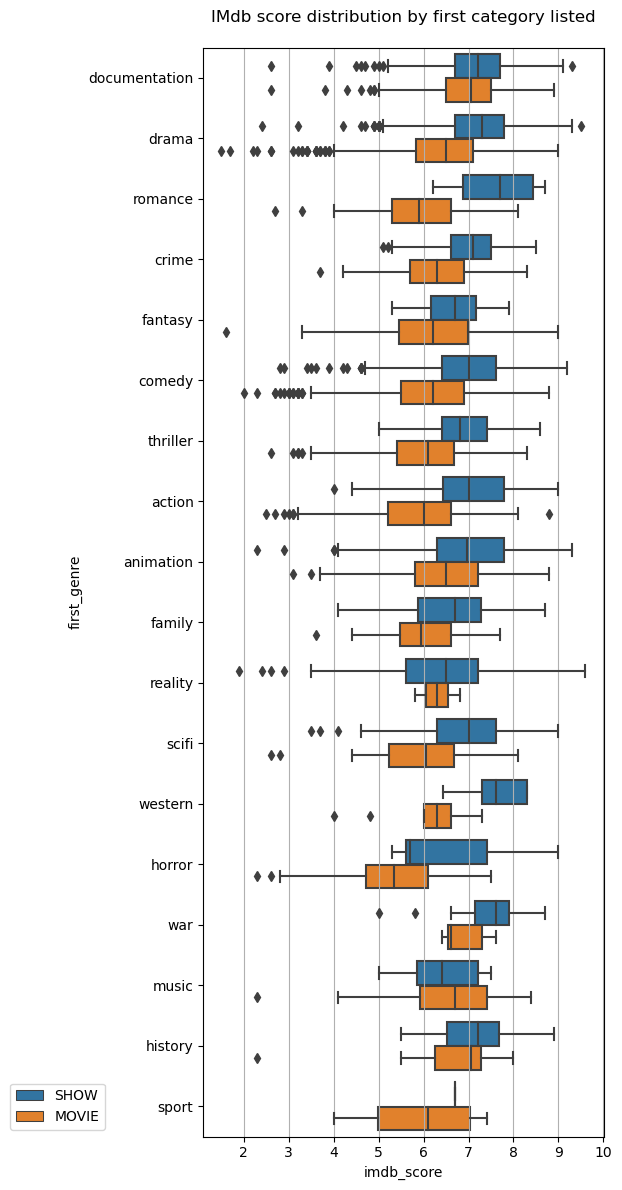

In [25]:
# Imdb scores by category
fig=plt.figure(figsize=(6,12),tight_layout=True)
ax=sns.boxplot(data=df_big,x="imdb_score",y="first_genre",hue="type")
ax.grid(axis="x")
plt.title("IMdb score distribution by first category listed\n")
plt.legend(bbox_to_anchor=(-0.5,0),loc="lower left")